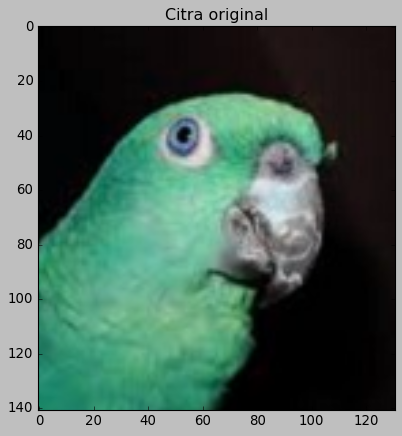

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

imgOri = cv2.imread("beo.png")
#Citra original
plt.title('Citra original')
plt.imshow(imgOri)
plt.show()

In [10]:
print(imgOri)

[[[  2   2   2]
  [  1   1   1]
  [  3   3   3]
  ...
  [ 24  14  14]
  [ 24  14  14]
  [ 23  13  13]]

 [[  2   2   2]
  [  0   0   0]
  [  3   3   3]
  ...
  [ 24  14  14]
  [ 23  13  13]
  [ 23  13  13]]

 [[  2   2   2]
  [  0   0   0]
  [  3   3   3]
  ...
  [ 24  14  14]
  [ 23  13  13]
  [ 23  13  13]]

 ...

 [[ 26 135 103]
  [ 25 134 102]
  [ 26 135 103]
  ...
  [ 10   8   8]
  [  8   6   6]
  [  9   7   7]]

 [[ 27 136 104]
  [ 26 135 103]
  [ 27 136 104]
  ...
  [ 10   8   8]
  [  8   6   6]
  [  9   7   7]]

 [[ 27 134 102]
  [ 28 135 103]
  [ 29 136 104]
  ...
  [ 10   8   8]
  [  8   6   6]
  [  9   7   7]]]


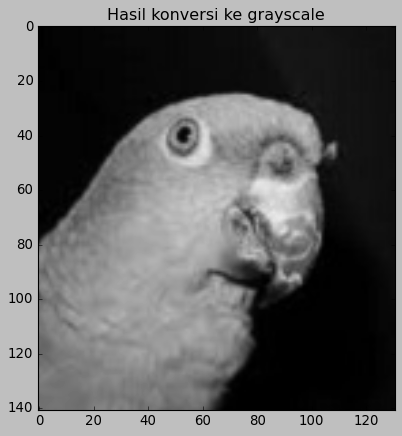

In [11]:
#Convert ke grayscale
img = cv2.cvtColor(imgOri, cv2.COLOR_BGR2GRAY)

#Konversi ke grayscale
plt.title('Hasil konversi ke grayscale')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
#plt.imshow(img)
plt.show()

In [12]:
print(img)

[[  2   1   3 ...  15  15  14]
 [  2   0   3 ...  15  14  14]
 [  2   0   3 ...  15  14  14]
 ...
 [113 112 113 ...   8   6   7]
 [114 113 114 ...   8   6   7]
 [112 113 114 ...   8   6   7]]


In [3]:
h,w = np.shape(img)
t0=127
t=127 #initial condition
g1 = []
g2 = []
# camel_Prewitt camel_Prewitt_X camel_Prewitt_Y
#calculating t by algorithm
while(1):
    for px in range(0,h):
        for py in range(0,w):
            if (img[px][py] < t):
                g1.append(img[px][py])
            else:
                g2.append(img[px][py])
    mu1 = sum(g1) / len(g1)
    mu2 = sum(g2) / len(g2)
    t0=t
    t = ((mu1+ mu2)/2)
    delta_t = abs(t-t0)
#     print(mu1,mu2,t,delta_t)
    if(delta_t < 1):
        break
print (len(g1))
print(t)
rata2 = round(t,0)
print(rata2)

50889
82.33079718527033
82.0


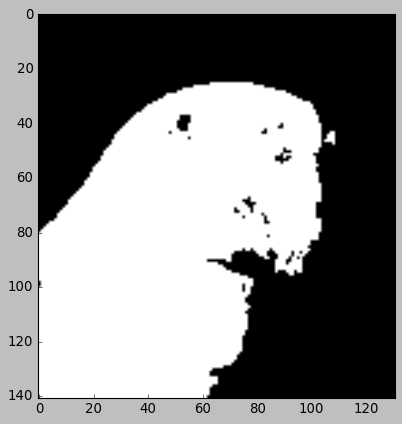

In [4]:
# thres_finder(img)
np.shape(img)
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

setelahnya = global_threshold(img,t,255,0)
plt.imshow(setelahnya, cmap='gray', vmin=0, vmax=255)

20


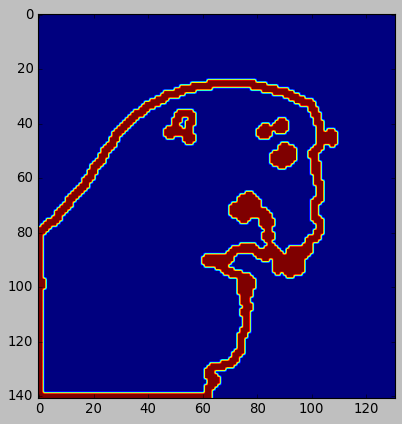

In [34]:
blank = np.zeros(setelahnya.shape, dtype='uint8')
contours, hirarki = cv2.findContours(setelahnya, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)}')
cv2.drawContours(blank, contours, -1, (255,255,255),2)
plt.imshow(blank)

In [13]:
print(setelahnya)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


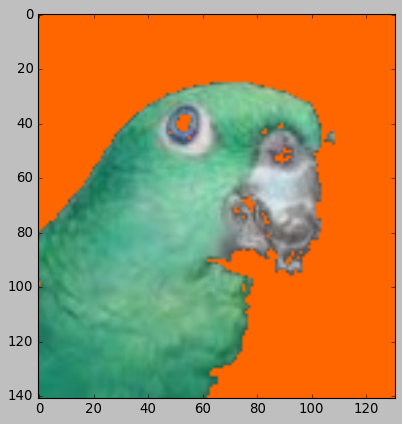

In [14]:
for i in range(len(setelahnya)):
    for j in range(len(setelahnya[0])):
        if setelahnya[i][j] != 255:
            imgOri[i][j][0] = 255
            imgOri[i][j][1] = 102
            imgOri[i][j][2] = 0
            
plt.imshow(imgOri)